<a href="https://colab.research.google.com/github/nevin-arimilli/College-Football-Bowl-Games/blob/main/a1unstructured.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Use this code if using Colab to run Selenium

# Make sure to go to Runtime -> Change runtime and set GPU as hardware accelerator

# !kill -9 -1 # Use this line to delete this VM and start a new one.
# The above line deletes all files and folders from the current VM and allocates a new one.

#Selenium is an open-source tool that automates web browsers.
!pip install selenium
!apt-get -q update   #Used to handle installation and removal of softwares and libraries
!apt install -yq chromium-chromedriver #ChromeDriver is a separate executable that Selenium WebDriver uses to control Chrome.
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from selenium.webdriver.common.by import By
#WebDriver is a browser automation framework that works with open source APIs.
#The framework operates by accepting commands, sending those commands to a browser, and interacting with applications.
chrome_options = webdriver.ChromeOptions()
#headless means running chrome with chrome.exe
chrome_options.add_argument('--headless')

chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists...
Reading package lists...
Building dependency tree...
Reading state information...
chromium-chromedriver is already the newest version (1:85.0.4183.83-0ubuntu2.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
cp: '/u

In [ ]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from time import sleep
from random import randint
import nltk
from nltk import word_tokenize
from collections import Counter
nltk.download('punkt')
nltk.download('stopwords')
import string
from collections import defaultdict
import matplotlib.pyplot as plt
from itertools import combinations
from itertools import product
from sklearn.manifold import MDS

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
wd = webdriver.Chrome(options=chrome_options)

In [ ]:
# Source: https://towardsdatascience.com/web-scraping-using-selenium-python-8a60f4cf40ab
wd.get('https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans')
#print(wd.page_source)

In [ ]:
time_element = wd.find_element(by=By.XPATH,value='//*[@id="Comment_1726631"]/div/div[2]/div[2]/span/a/time')
time = time_element.text
date = time_element.get_attribute('title')

print(date)
print(time)

March 24, 2002 10:54PM
March 2002


In [ ]:
userid=wd.find_element(by=By.XPATH,value='//*[@id="Comment_1726631"]/div/div[3]/div/div[1]')
userid = userid.text

print(userid)

I personally think that with a few tweaks the C320 could also sit at the top of this group. It's still more of a entry-level luxury sedan than Mercedes would lead you to believe. The C320 "Sport" needs to have it's suspension retuned to accept 17 inch tires without a harsh ride. MB also needs to stop forcing metal trim and black leather on everyone that wants the sport package. The C240's 6-speed wouldn't hurt either if offered on the C320, though it needs to be "fixed" first.

That said, my favorite of the group is (gasp!) the new A4 3.0. The A4 easily has the best interior of any sub-40K car, combine that with stunning looks and a body that is as rigid as any ever made and you have my personal favorite. The single thing I don't like about the A4 is the grey trim around the bottom of the car. This trim doesn't match any of the body colors, as it should be body color anyway. This is an excellent car and in my opinion the best there is under 40K. The upcoming A4 Convertible, Coupe and S

In [ ]:
headers = {"Accept-Language": "en-US,en;q=0.5"}
date = []
message = []

In [ ]:
pages = np.arange(335, 436,1)
print(pages)

[335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352
 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370
 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388
 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406
 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424
 425 426 427 428 429 430 431 432 433 434 435]


In [ ]:
for page in pages:
  page = requests.get("https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans"+"/p"+str(page))
  soup = BeautifulSoup(page.text, 'html.parser')
  Comment = soup.find_all('div', {'class': 'Comment'})
  for item in Comment:
    comment = item.find('div',{'class' : 'Message userContent'}).text.strip()
    message.append(comment)

    time = item.find('time')['title']
    date.append(time)


In [ ]:
df_edmunds = pd.DataFrame({"Date" : date, "Message" : message})
df_edmunds

,Date,Message
0,"February 25, 2014 6:50PM",@roadburner\nYou hit the nail on the head. You...
1,"February 25, 2014 7:09PM",now that I have inherited my Acura TL back (a ...
2,"February 25, 2014 7:25PM",@stickguy\nEven with the coil packs you had to...
3,"February 26, 2014 10:59AM",@nyccarguy\nExactly. You have to evaluate all ...
4,"February 26, 2014 11:14AM",@roadburner said:\nnyccarguy\nExactly. You hav...
...,...,...
5028,"July 26, 2020 3:42PM",There's speculation that the ILX name might be...
5029,"July 26, 2020 3:47PM","if they won't bring back Integra, the RSX is a..."
5030,"July 26, 2020 3:54PM","Yes, I'd like to see Acura bring back a hatchb..."
5031,"May 5, 2021 6:35PM",@explorerx4 : How do you like your Lincoln MKZ...


In [ ]:
df_edmunds.to_csv("edmunds.csv")
from google.colab import files
files.download("edmunds.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_edmunds = pd.read_csv('edmunds.csv')
df_edmunds

,Unnamed: 0,Date,Message
0,0,"February 25, 2014 6:50PM",@roadburner\nYou hit the nail on the head. You...
1,1,"February 25, 2014 7:09PM",now that I have inherited my Acura TL back (a ...
2,2,"February 25, 2014 7:25PM",@stickguy\nEven with the coil packs you had to...
3,3,"February 26, 2014 10:59AM",@nyccarguy\nExactly. You have to evaluate all ...
4,4,"February 26, 2014 11:14AM",@roadburner said:\nnyccarguy\nExactly. You hav...
...,...,...,...
5028,5028,"July 26, 2020 3:42PM",There's speculation that the ILX name might be...
5029,5029,"July 26, 2020 3:47PM","if they won't bring back Integra, the RSX is a..."
5030,5030,"July 26, 2020 3:54PM","Yes, I'd like to see Acura bring back a hatchb..."
5031,5031,"May 5, 2021 6:35PM",@explorerx4 : How do you like your Lincoln MKZ...


In [ ]:
df_edmunds['Message'] = df_edmunds['Message'].astype(str)
all = ' '.join(df_edmunds['Message'])

In [ ]:
token = nltk.word_tokenize(all)
def remove_punctuation(text):
    return ''.join([char for char in text if char not in string.punctuation])

word_counts = Counter(token)
word_counts_no_punct = {word: count for word, count in word_counts.items() if remove_punctuation(word)}
word_counts_no_punctc = Counter(word_counts_no_punct)
most_common_words_no_punct = Counter(word_counts_no_punct).most_common(100)

#print(word_counts)
print(most_common_words_no_punct)

[('the', 29293), ('a', 15010), ('I', 14145), ('to', 13003), ('and', 12039), ('of', 9413), ('is', 8368), ('it', 7628), ('that', 7616), ('in', 7365), ('for', 5990), ('with', 4958), ("'s", 4639), ('you', 4619), ('on', 4573), ("n't", 4022), ('have', 3963), ('be', 3759), ('was', 3591), ('but', 3583), ('car', 3520), ('are', 3478), ('my', 3332), ('not', 3226), ('at', 3173), ('as', 3139), ('they', 3057), ('said', 2967), ('or', 2945), ('do', 2472), ('would', 2435), ('an', 2427), ('like', 2291), ('The', 2239), ('more', 1993), ('cars', 1990), ('if', 1971), ('has', 1951), ('this', 1917), ('one', 1891), ('about', 1822), ('just', 1804), ('so', 1748), ('than', 1739), ('BMW', 1720), ('all', 1700), ('can', 1662), ('will', 1650), ('get', 1643), ('me', 1641), ('from', 1608), ('had', 1583), ('new', 1547), ('what', 1496), ('up', 1441), ('out', 1440), ('think', 1436), ('we', 1368), ('Audi', 1362), ('some', 1288), ('their', 1249), ('no', 1233), ('even', 1229), ('there', 1210), ('It', 1165), ("'m", 1148), ('w

In [ ]:
word_ranks = range(1, len(word_counts_no_punctc) + 1)

# Calculate expected frequencies based on Zipf's Law
total_word_count = sum(word_counts_no_punctc.values())
expected_frequencies = [total_word_count / rank for rank in word_ranks]

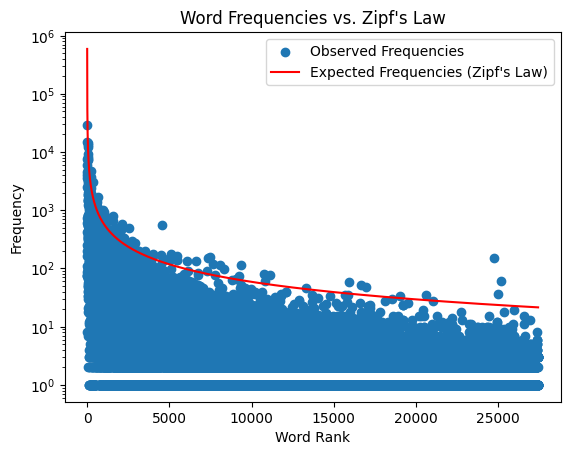

In [ ]:
plt.scatter(word_ranks, list(word_counts_no_punctc.values()), label='Observed Frequencies')
plt.plot(word_ranks, expected_frequencies, 'r-', label='Expected Frequencies (Zipf\'s Law)')
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
plt.yscale('log')  # Use a logarithmic scale for the y-axis
plt.legend()
plt.title('Word Frequencies vs. Zipf\'s Law')
plt.show()

In [ ]:
top_100_words = [word for word, _ in most_common_words_no_punct]
top_100_frequencies = [word_counts[word] for word in top_100_words]

In [ ]:
word_ranks100 = range(1, len(most_common_words_no_punct) + 1)

# Calculate expected frequencies based on Zipf's Law
total_word_count = sum(top_100_frequencies)
expected_frequencies = [total_word_count / rank for rank in word_ranks100]

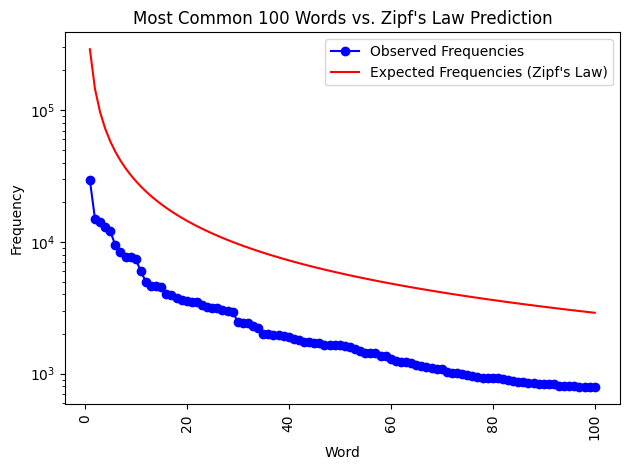

In [ ]:
plt.plot(word_ranks100, top_100_frequencies,marker='o', linestyle='-', color='b', label='Observed Frequencies')

# Plot the theoretical prediction of Zipf's Law as a line
plt.plot(word_ranks100, expected_frequencies, 'r-', label='Expected Frequencies (Zipf\'s Law)')

plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.yscale('log')  # Use a logarithmic scale for the y-axis
plt.legend()
plt.title('Most Common 100 Words vs. Zipf\'s Law Prediction')
plt.tight_layout()
plt.show()

In [ ]:
df_edmunds['Message'] = df_edmunds['Message'].astype(str)

# Tokenize messages
df_edmunds['Tokens'] = df_edmunds['Message'].apply(nltk.tokenize.word_tokenize)

# Define stopwords
stop_words = nltk.corpus.stopwords.words('english') + list(string.punctuation)

# Function to remove stopwords
def remove_stopwords(word_tokens):
    return [w for w in word_tokens if w.lower() not in stop_words]

df_edmunds['Tokens'] = df_edmunds['Tokens'].apply(remove_stopwords)

In [ ]:
# Load car models and brands
models = pd.read_csv('car_models_and_brands.csv', header=None, names=['Brand','Model'])
values_to_remove = ['car', 'seat', 'problem', 'brand']

# Use boolean indexing to filter rows
filtered_models = models[~models['Brand'].isin(values_to_remove)]
models_dict = dict(zip(filtered_models.Model.str.lower(), filtered_models.Brand.str.lower()))

# Function to replace car models with brands
def replace_with_brand(tokens):
    return list(set([models_dict[token.lower()] if token.lower() in models_dict
                     else token.lower() for token in tokens]))

df_edmunds['Tokens'] = df_edmunds['Tokens'].apply(replace_with_brand)

# Get brand frequencies
brand_freq = {}
for tokens in df_edmunds['Tokens']:
    for token in tokens:
        if token in filtered_models['Brand'].str.lower().tolist():
            brand_freq[token] = brand_freq.get(token, 0) + 1

# Display top 10 brands
top_brands = sorted(brand_freq.items(), key=lambda x: x[1], reverse=True)[:10]
df_top_brands = pd.DataFrame(top_brands, columns=['Brand', 'Frequency'])
print('\n \033[1m' + 'Brands with Highest Frequency:' + '\033[0m')
display(df_top_brands)


 Brands with Highest Frequency:


,Brand,Frequency
0,bmw,1275
1,audi,959
2,brand,642
3,acura,603
4,honda,520
5,sedan,307
6,volkswagen,287
7,infiniti,272
8,toyota,257
9,cadillac,253


In [ ]:
top_10_brands = df_top_brands["Brand"]

def calculate_lift(brand1, brand2, df):
    cooccurrences = 0
    total_messages = len(df)
    min_distance = 7

    for message_tokens in df_edmunds['Tokens']:
        brand1_mentions = [i for i, token in enumerate(message_tokens) if token == brand1]
        brand2_mentions = [i for i, token in enumerate(message_tokens) if token == brand2]

        for mention1, mention2 in product(brand1_mentions, brand2_mentions):
            distance = abs(mention1 - mention2)
            if distance <= min_distance:
                cooccurrences += 1
                break  # Count only one co-occurrence per message

    prob_brand1 = sum(df['Tokens'].apply(lambda x: x.count(brand1))) / total_messages
    prob_brand2 = sum(df['Tokens'].apply(lambda x: x.count(brand2))) / total_messages
    prob_brand1_and_brand2 = cooccurrences / total_messages
    lift = prob_brand1_and_brand2 / (prob_brand1 * prob_brand2)
    return lift

# Calculate lift ratios between the top-10 brands
lift_results = defaultdict(dict)

for brand1, brand2 in combinations(top_10_brands, 2):
    lift = calculate_lift(brand1, brand2, df_edmunds)
    lift_results[brand1][brand2] = lift
    lift_results[brand2][brand1] = lift

#Display the lift ratios
for brand1, values in lift_results.items():
    for brand2, lift in values.items():
        print(f"Lift({brand1}, {brand2}): {lift}")

Lift(bmw, audi): 0.09055674824674396
Lift(bmw, brand): 0.07378413047461975
Lift(bmw, acura): 0.45824472409195854
Lift(bmw, honda): 0.7591251885369532
Lift(bmw, sedan): 0.19287219773903047
Lift(bmw, volkswagen): 0.013754184600669536
Lift(bmw, infiniti): 0.3773298731257209
Lift(bmw, toyota): 0.030719462882429237
Lift(bmw, cadillac): 0.35885918003565065
Lift(audi, bmw): 0.09055674824674396
Lift(audi, brand): 0.024524183095709123
Lift(audi, acura): 0.07833097287286198
Lift(audi, honda): 0.02018528916339135
Lift(audi, sedan): 1.2650324544092824
Lift(audi, volkswagen): 0.07314529871054706
Lift(audi, infiniti): 0.01929476170030056
Lift(audi, toyota): 0.0
Lift(audi, cadillac): 0.02074377542482906
Lift(brand, bmw): 0.07378413047461975
Lift(brand, audi): 0.024524183095709123
Lift(brand, acura): 0.7150514302836802
Lift(brand, honda): 0.24121734962856456
Lift(brand, sedan): 0.1276801932073021
Lift(brand, volkswagen): 0.08194666058810121
Lift(brand, infiniti): 0.2593973336998351
Lift(brand, toyota)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


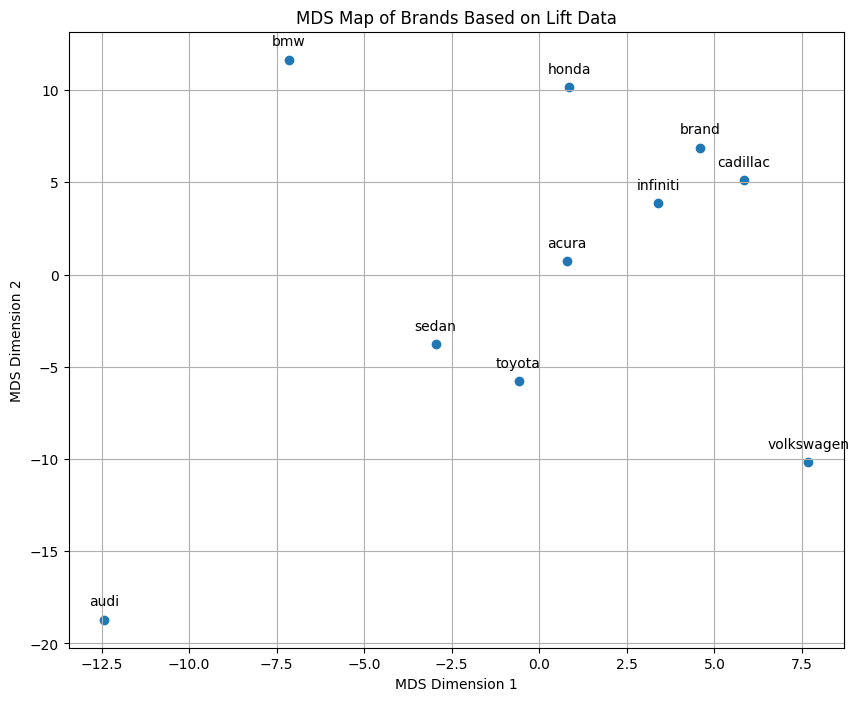

In [ ]:
unique_brands = set(brand1 for brand1 in lift_results.keys() for brand2 in lift_results[brand1].keys())

# Create an empty dissimilarity matrix filled with zeros
n_brands = len(unique_brands)
dissimilarity_matrix = np.zeros((n_brands, n_brands))

# Fill the dissimilarity matrix with inverse lift values, ignoring zero lifts
for i, brand1 in enumerate(unique_brands):
    for j, brand2 in enumerate(unique_brands):
        if i != j:
            lift_value = lift_results.get(brand1, {}).get(brand2, 0)
            if lift_value != 0:
                dissimilarity_matrix[i, j] = 1 / lift_value

# Perform MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
brand_positions = mds.fit_transform(dissimilarity_matrix)

# Create a DataFrame for the MDS results
unique_brands_list = list(unique_brands)
mds_df = pd.DataFrame(brand_positions, columns=['X', 'Y'], index=unique_brands_list)

# Plot the MDS map
plt.figure(figsize=(10, 8))
plt.scatter(mds_df['X'], mds_df['Y'])

# Annotate points with brand names
for brand, (x, y) in mds_df.iterrows():
    plt.annotate(brand, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('MDS Map of Brands Based on Lift Data')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.grid(True)

# Show the plot
plt.show()

E. We can see from the lift ratios and the MDS map which brands are competitive with others. We notice that Cadillac and Infiniti have a very high/positive association with a lift ratio of 3.291, and from the MDS map, it is evident that they are competitors as they are very close to each other. Also, Infiniti and Acura have a positive association with a lift ratio of 1.69. The MDS map also conveys that Infiniti and Acura have high similarity as they are quite close to each other as well. From this information, we can determine that Infiniti’s main competition is with Cadillac and Acura. In addition, we see that Acura and Honda are potential competitors. With a lift ratio of 1.24 the two brands have a strong association with each other; the MDS map also shows that Acura and Honda are fairly close to each other. Overall, after analyzing lift ratios and our MDS map, Infiniti is most competitive with Cadillac and Acura, and Honda and Acura are likely competitors as well. All other brands, such as Toyota, BMW, Volkswagen, and Audi have weak/independent associations with all other brands, therefore, we can conclude that there is no evidence of competition.
